In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# 1. Generate Summary Statistics
print("Summary Statistics:")
print(titanic_data.describe())  # Numeric features
print("\nMedian:\n", titanic_data.median(numeric_only=True))
print("\nStandard Deviation:\n", titanic_data.std(numeric_only=True))

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Median:
 PassengerId    446.0000
Survived         0.0000
Pcl

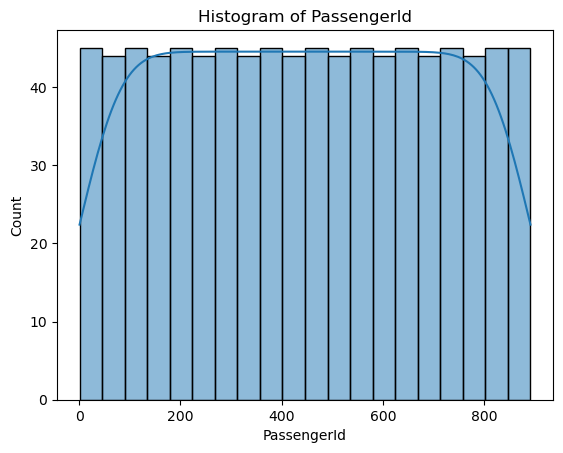

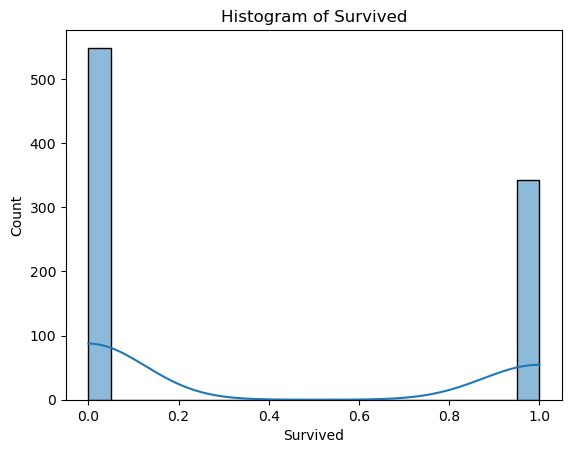

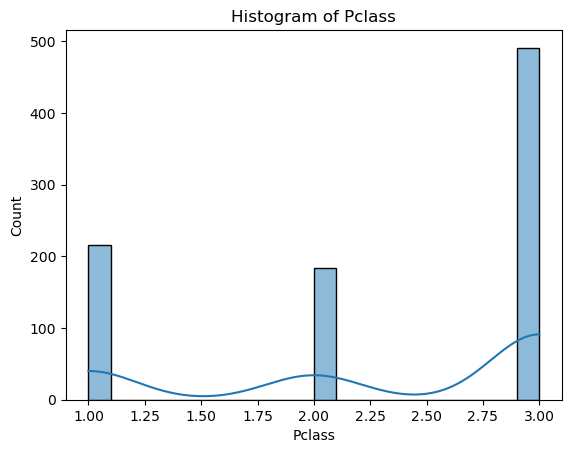

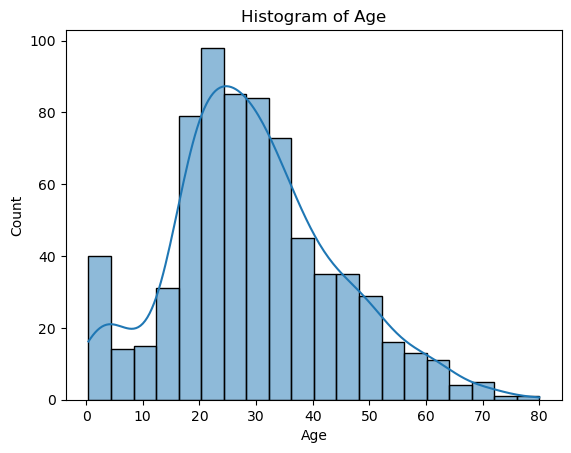

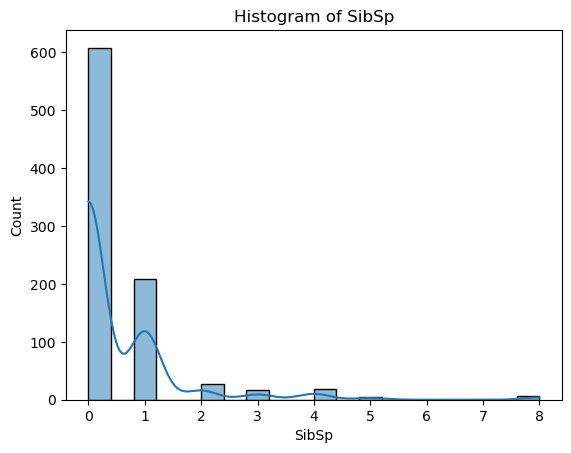

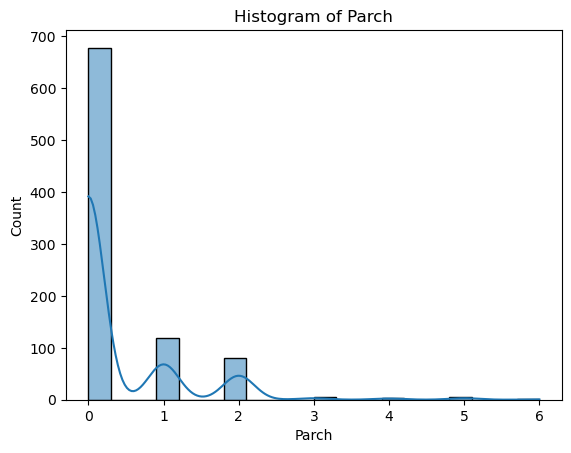

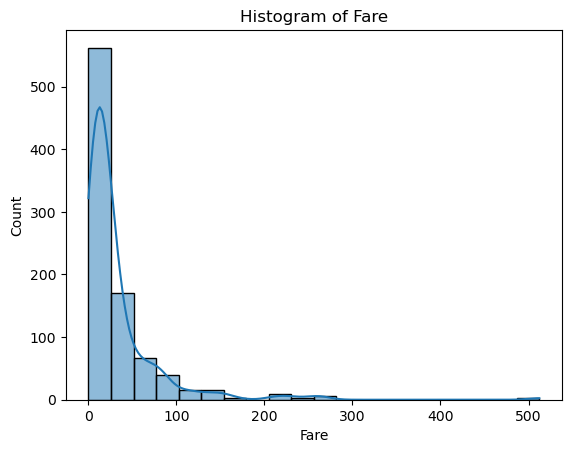

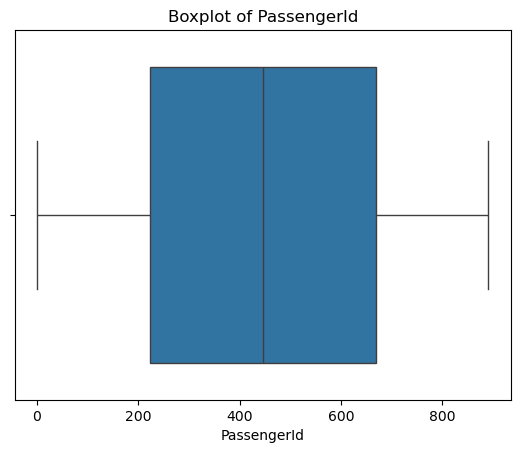

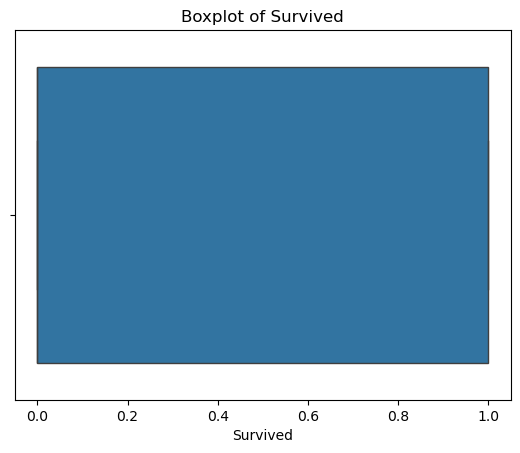

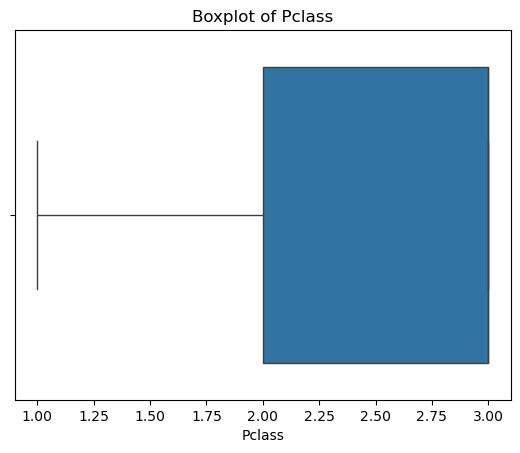

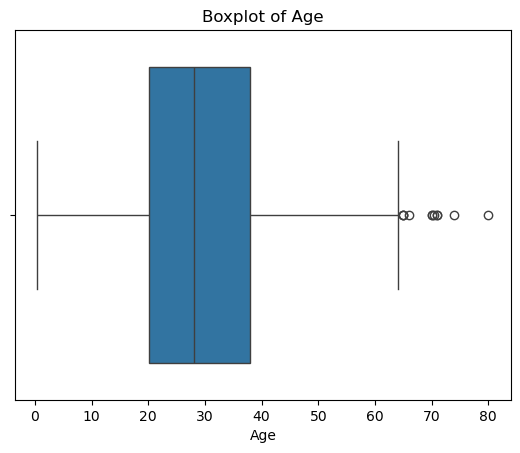

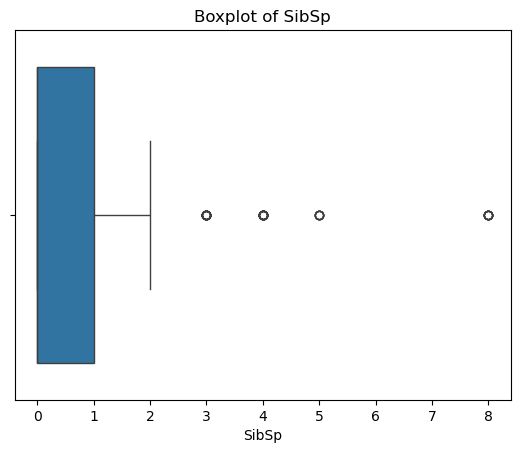

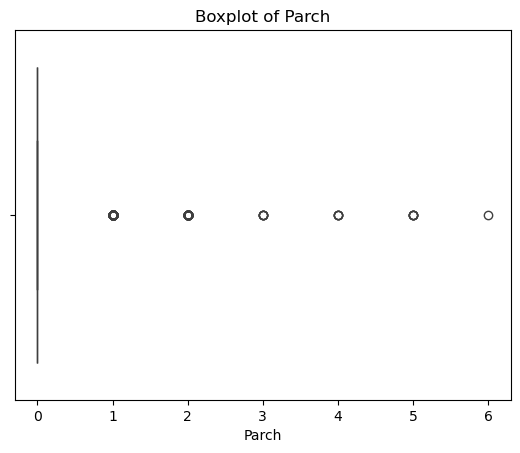

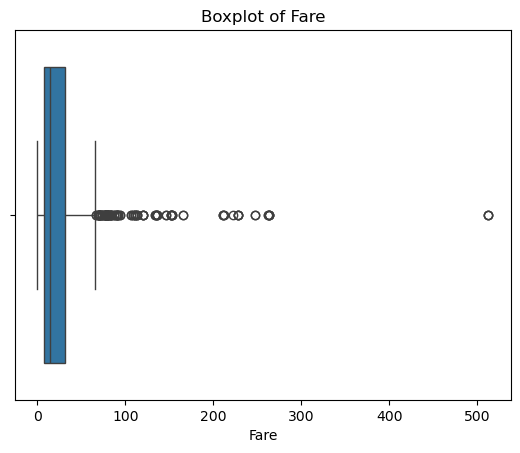

In [4]:
# 2. Create Histograms and Boxplots for Numeric Features
numeric_cols = titanic_data.select_dtypes(include=['float64', 'int64']).columns

# Histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(titanic_data[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=titanic_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

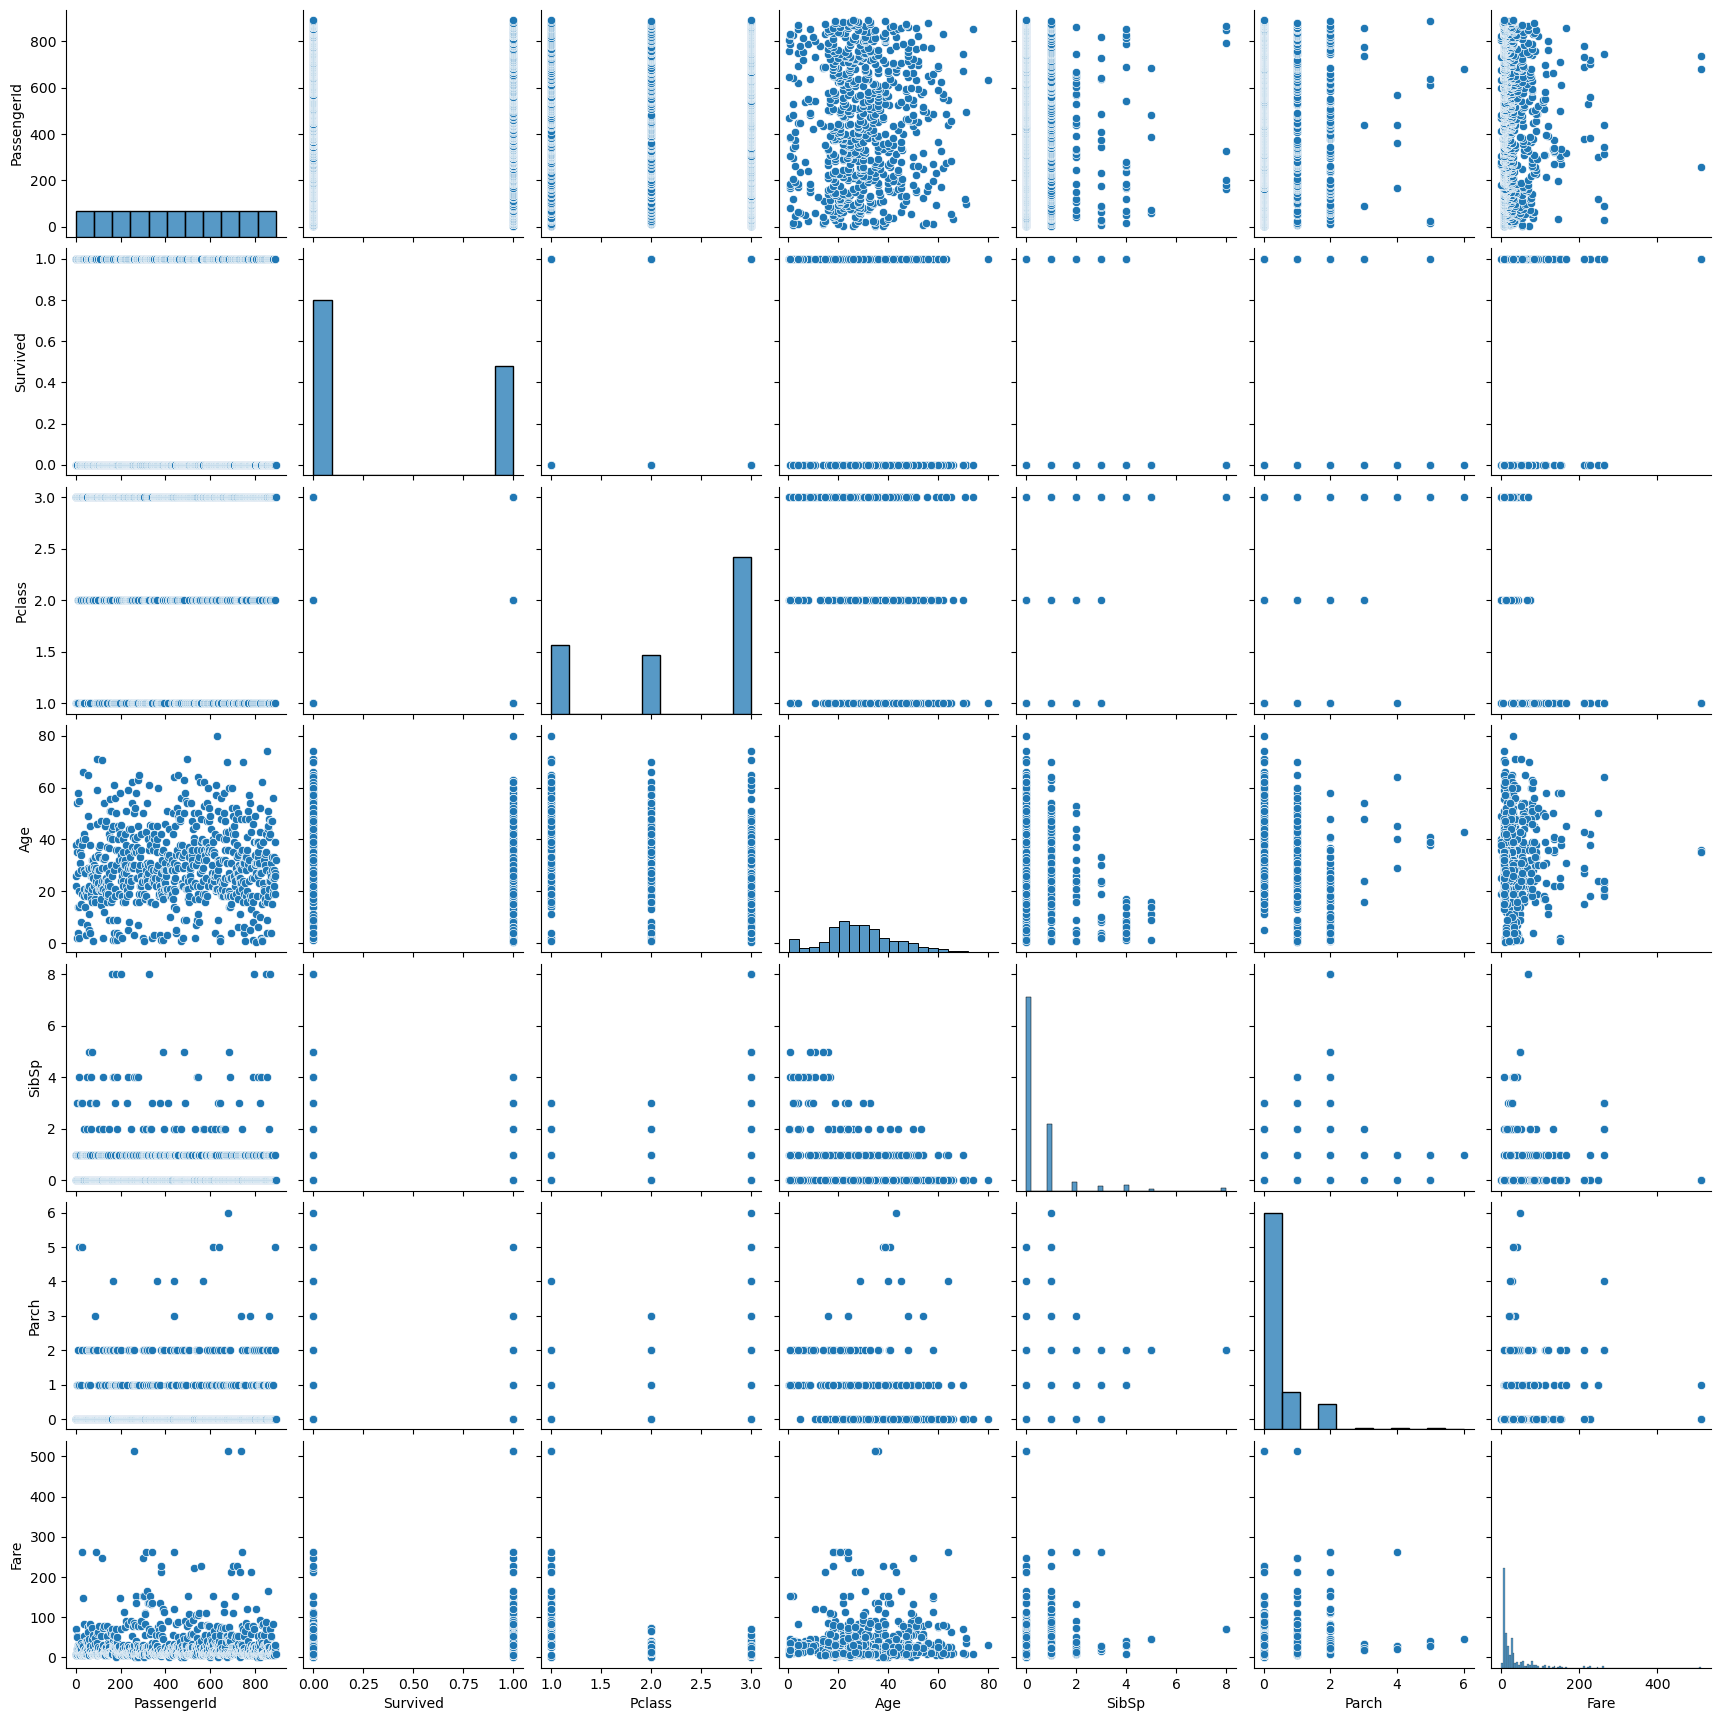

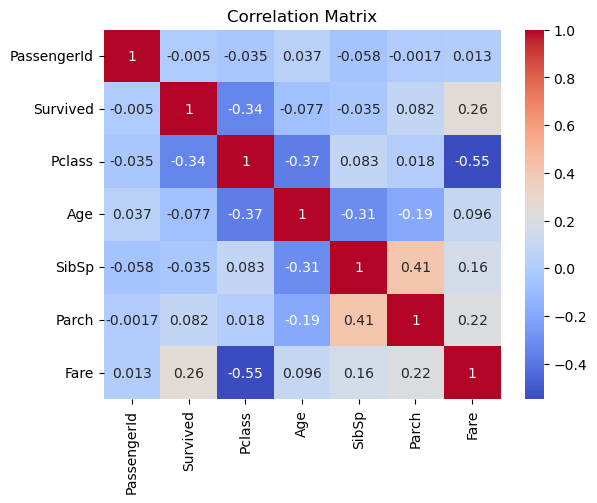

In [5]:
# 3. Use Pairplot and Correlation Matrix for Feature Relationships
# Pairplot
sns.pairplot(titanic_data[numeric_cols])
plt.show()

# Correlation Matrix
correlation_matrix = titanic_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# 4. Identify Patterns, Trends, or Anomalies
# (Example: Identify missing or outlier values)
print("\nMissing Values:")
print(titanic_data.isnull().sum())

# Example of anomaly/outlier detection in Age column
q1 = titanic_data['Age'].quantile(0.25)
q3 = titanic_data['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = titanic_data[(titanic_data['Age'] < lower_bound) | (titanic_data['Age'] > upper_bound)]
print(f"\nOutliers in Age:\n{outliers}")


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Outliers in Age:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2      

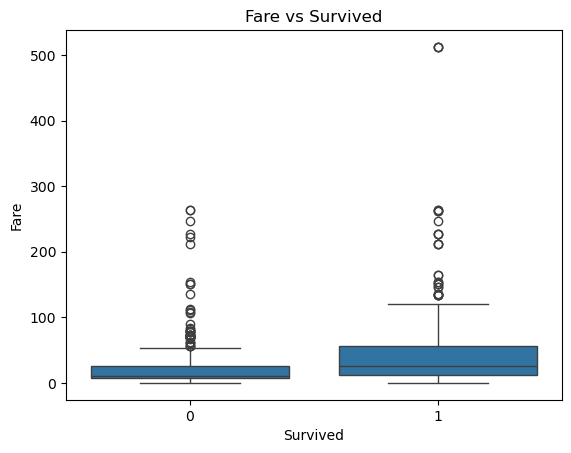

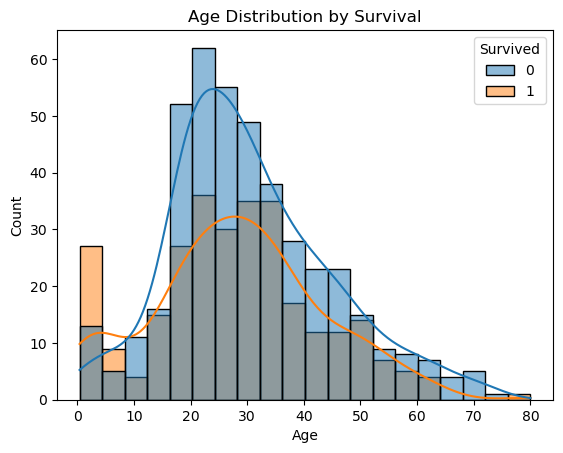

In [7]:
# 5. Make Basic Feature-Level Inferences from Visuals
# Example: Relationship between Fare and Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title("Fare vs Survived")
plt.show()

# Example: Distribution of Age vs Survived
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()